In [1]:
%matplotlib inline 
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

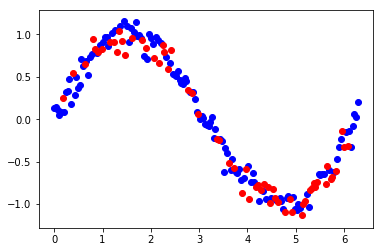

In [2]:
from sklearn.model_selection import train_test_split

def f(x):
    return np.sin(x)

X=np.linspace(0, 2*np.pi,180)
y= f(X)+np.random.normal(0,0.1,180)  # np.sqrt(np.abs(X))*
X = np.atleast_2d(X).T

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=40)
plt.scatter(X_train,y_train, c='b')
plt.scatter(X_test, y_test, c='r')

In [19]:
# define fit polynomial 
def polynomial(X, wtvector):
    w = np.asarray(wtvector)
    n = len(w)
    out = 0 
    for i in range(n):
        out += w[n-i-1]*np.power(X, i) # w[n-1]*1 + w[n-2]*x + w[n-3]*(x**2) + ... + w[0]*(x**(n-1))
    return out

def designmatpoly(X, wtvector):
    X = X[:,0]
    eye = np.ones(X.shape)
    Xsq = polynomial(X, wtvector ) # equivalent to np.square(X)
    return np.stack((eye, X, Xsq)).T

In [16]:
# define regularisation gradient descent function
def gradientdescent(Amat, y, winit, rate, numiter):
    n, p = Amat.shape
    whistory = []
    losshistory = [] 
    w = winit
    for i in range(numiter): 
        loss = np.square(y-Amat.dot(w)).mean()
        whistory.append(w)
        losshistory.append(loss)
        grad = (-2/n)*Amat.T.dot((y-Amat.dot(w)))
        w = w - rate*grad
    return w, np.asarray(whistory), np.asarray(losshistory)

def reg_gradientdescent(w, X, y, l1, l2, core=1, rate = 0.1, n_iterations = 50):
    wtseq = [w]
    for iteration in range(n_iterations):
        gradients =  core*2/len(X) * X.T.dot(X.dot(w) - y) + \
                    l1 * np.sign(w) + 2 * l2 * w

        w = w - rate * gradients
        wtseq.append(w)
    return np.array(wtseq)

In [ ]:
# non-linear regression
A_train = designmatpoly(X_train, wtvector)
A_test = designmatpoly(X_test, wtvector)

fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')

for d in range(5):
    w0 = np.random.randn(i + 2)

In [18]:
for i in range(5):
    print(i)

0
1
2
3
4


In [ ]:
plt.plot(gradientdescent(Aquad, y0,  w0, r, 20)[2],label=r)

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly2feat = PolynomialFeatures(degree =2, include_bias = True)
A_test_sklearn = poly2feat.fit_transform(X_test) # scikit-learn's design matrix
print(np.sum(A_test - A_test_sklearn)**2) # print sum of squares of the entries of the matrix of differences

0.0


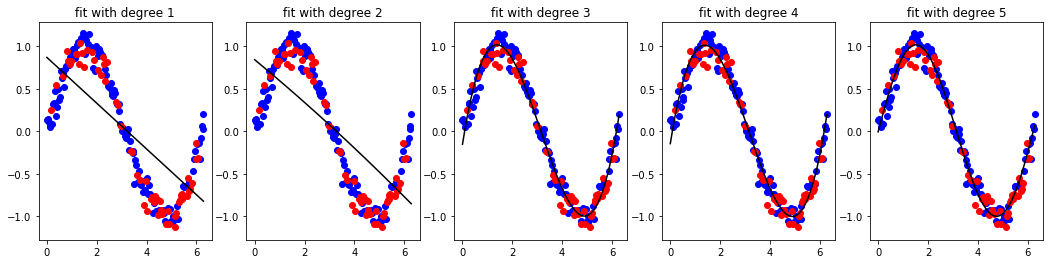

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

fig, ax = plt.subplots(figsize=(18,4),nrows=1, ncols=5,sharex='col')

for d in range(5):
    features = PolynomialFeatures(degree = d+1, include_bias = True)
    X_feature = features.fit_transform(X)
    X_feature_train =  features.fit_transform(X_train)
    X_feature_test =  features.fit_transform(X_test)
    regress = LinearRegression()
    regress.fit(X_feature_train, y_train)
    y_predict=regress.predict(X_feature_test)
    y_model = regress.predict(X_feature)
#    print(linear_reg.coef_, linear_reg.intercept_)
    ax[d].scatter(X_train,y_train, c='b')
    ax[d].scatter(X_test, y_test, c='r')
    ax[d].plot(X, y_model, c='k')
    title = 'fit with degree '+str(d+1)
    ax[d].set_title(title)

In [6]:
a = np.arange(9) - 4
N2 = np.linalg.norm(a, ord=2)
print(N2**2)

60.0


In [13]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=3, test_size=.3, random_state=0)

In [14]:
from sklearn.model_selection import KFold
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4])
kf = KFold(n_splits=2)
kf.get_n_splits(X)

print(kf)  

for train_index, test_index in kf.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]

KFold(n_splits=2, random_state=None, shuffle=False)
TRAIN: [2 3] TEST: [0 1]
TRAIN: [0 1] TEST: [2 3]
